In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
Z = 18

In [2]:
nm5 = np.genfromtxt("Absorbance/Abs5nm.csv", delimiter=',', skip_header=1)
nm15 = np.genfromtxt("Absorbance/Abs15nm.csv", delimiter=',', skip_header=1)
nm35 = np.genfromtxt("Absorbance/Abs35nm.csv", delimiter=',', skip_header=1)
nms = [nm5, nm15, nm35]
colors = cm.plasma(np.linspace(0,1,14))
titles = ["3.5 nm", "13.0 nm", "36.9 nm"]

In [3]:
print(np.shape(nm5))
print(np.shape(nm15))
print(np.shape(nm35))

(651, 14)
(651, 11)
(651, 14)


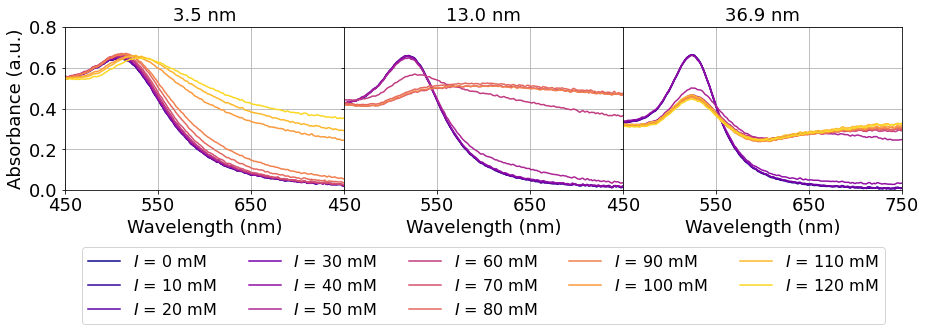

In [4]:
fig, axs = plt.subplots(figsize=(15,3), ncols=3, nrows=1, sharey=True, gridspec_kw={'hspace':0.0, 'wspace':0.0})
axs[0].set_ylabel("Absorbance (a.u.)", fontsize=Z)
for ax, nm, title in zip(axs, nms, titles):
    for i, (salt, c) in enumerate(zip(nm[:,1:].T, colors)):
        ax.plot(nm[:,0], salt, c=c, label=r"$I$ = {:d} mM".format(i*10), lw=1.5)
    ax.tick_params(labelsize=Z)
    ax.set_xlim(450, 750)
    ax.set_ylim(0,0.8)
    ax.set_xticks([450, 550, 650])
    ax.set_xlabel("Wavelength (nm)", fontsize=Z)
    ax.grid()
    ax.set_title(title, fontsize=Z)
axs[-1].set_xticks([450, 550, 650, 750])
axs[-1].legend(bbox_to_anchor=(-0.5, -0.3), fontsize=Z-2, ncol=5, loc='upper center')
plt.savefig("Absorbance.png", format='png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [6]:
rel = np.genfromtxt("Absorbance/AbsRel.csv", delimiter=',', skip_header=2)
c_size = cm.viridis(np.linspace(0.1,0.8,3))
c_size = [(0,0.3,0.8),(0.9, 0.6,0),(0.8,0,0.3)]

In [7]:
print(np.shape(rel))

(13, 4)


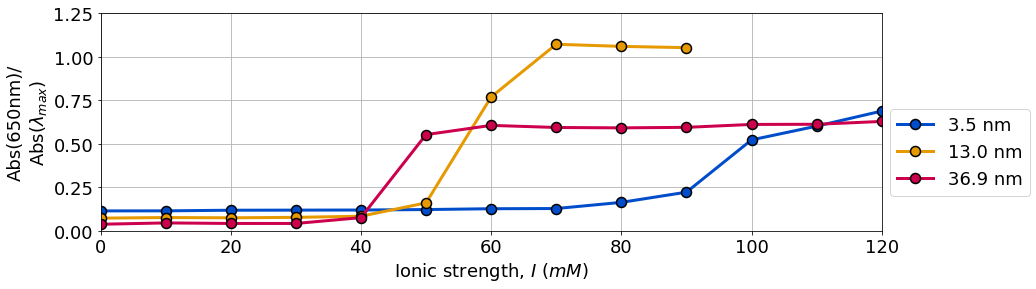

In [8]:
fig = plt.figure(figsize=(14,4))
ax = plt.axes()
for y, lab, c in zip(rel[:,1:].T, titles, c_size):
    ax.errorbar(rel[:,0], y, fmt='o-', mew=1.5, mec='k', ms=10, lw=3, label=lab, color=c)
ax.grid()
ax.tick_params(labelsize=Z)
ax.set_xlim(0, 120)
ax.set_ylim(0, 1.25)
ax.set_xlabel("Ionic strength, $I$ ($mM$)", fontsize=Z)
ax.set_ylabel("Abs(650nm)/\n"+r"Abs($\lambda_{max}$)", fontsize=Z)
ax.legend(bbox_to_anchor=(1.1, 0.6), fontsize=Z, loc='upper center')
plt.savefig("Absorbance_rel.png", format='png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()